In [1]:
import matplotlib
matplotlib.rcParams.update(matplotlib.rcParamsDefault)
import matplotlib.pyplot as plt
plt.rcParams.update({
    # "text.usetex": True,
    # "font.family": "Helvetica"
})
from labellines import labelLines
# plt.rcParams['axes.prop_cycle'] = plt.cycler(color=plt.cm.viridis.colors)
plt.rcParams['figure.dpi'] = 300
import numpy as np
import pandas as pd
import pickle
from tqdm import tqdm

In [2]:
# with open('dataset_new.pkl', 'rb') as f:
#     dataset = pickle.load(f)
#     print(len(dataset))
# dataset = dataset[:5000]

In [3]:
no_rl = pd.read_csv('rl_results/no_rl/results.csv')

In [4]:
no_rl[['color_acc', 'color_pos_acc', 'mean_pool_acc', 'filters_acc', 'deep_acc']].mean(axis=0)

color_acc        0.694798
color_pos_acc    0.721632
mean_pool_acc    0.725385
filters_acc      0.689901
deep_acc         0.726060
dtype: float64

In [5]:
template = {
    'Random': 0,
    'Optimal': 0,
    'Always Deep': 0,
    'No exploration': 0,
    'Greedy': 0,
    r'$\epsilon$-greedy ($\epsilon=0.1$)': 0,
    r'$\epsilon$-greedy ($\epsilon=0.2$)': 0,
    r'$\epsilon$-greedy ($\epsilon=0.1$, Optimistic)': 0,
    'Greedy (Optimistic)': 0,
    'LinUCB': 0,
    'UCB': 0,
    'UCB (Optimistic)': 0,
    'UCB (Smaller bound)': 0,
}

In [6]:
# Baselines
random_choice = np.load('./rl_results/random_choice.npy')
always_best = np.load('./rl_results/always_best.npy')
always_deep = np.load('./rl_results/always_deep.npy')
always_color = np.load('./rl_results/always_color.npy')

# e-greedy
greedy = np.load('./rl_results/greedy.npy')
e_greedy_01 = np.load('./rl_results/e_greedy_01.npy')
e_greedy_02 = np.load('./rl_results/e_greedy_02.npy')
e_greedy_01_opt = np.load('./rl_results/e_greedy_01_opt.npy')
greedy_opt = np.load('./rl_results/greedy_opt.npy')

# UCB
linucb = np.load('./rl_results/linucb.npy')
ucb = np.load('./rl_results/ucb.npy')
ucb_opt = np.load('./rl_results/ucb_optimistic.npy')
ucb_smaller_bound = np.load('./rl_results/ucb_smaller_bound.npy')

results = {
    'Random': random_choice,
    'Optimal': always_best,
    'Always Deep': always_deep,
    'No exploration': always_color,
    'Greedy': greedy,
    r'$\epsilon$-greedy ($\epsilon=0.1$)': e_greedy_01,
    r'$\epsilon$-greedy ($\epsilon=0.2$)': e_greedy_02,
    r'$\epsilon$-greedy ($\epsilon=0.1$, Optimistic)': e_greedy_01_opt,
    'Greedy (Optimistic)': greedy_opt,
    'LinUCB': linucb,
    'UCB': ucb,
    'UCB (Optimistic)': ucb_opt,
    'UCB (Smaller bound)': ucb_smaller_bound,
}

In [7]:
def_colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']

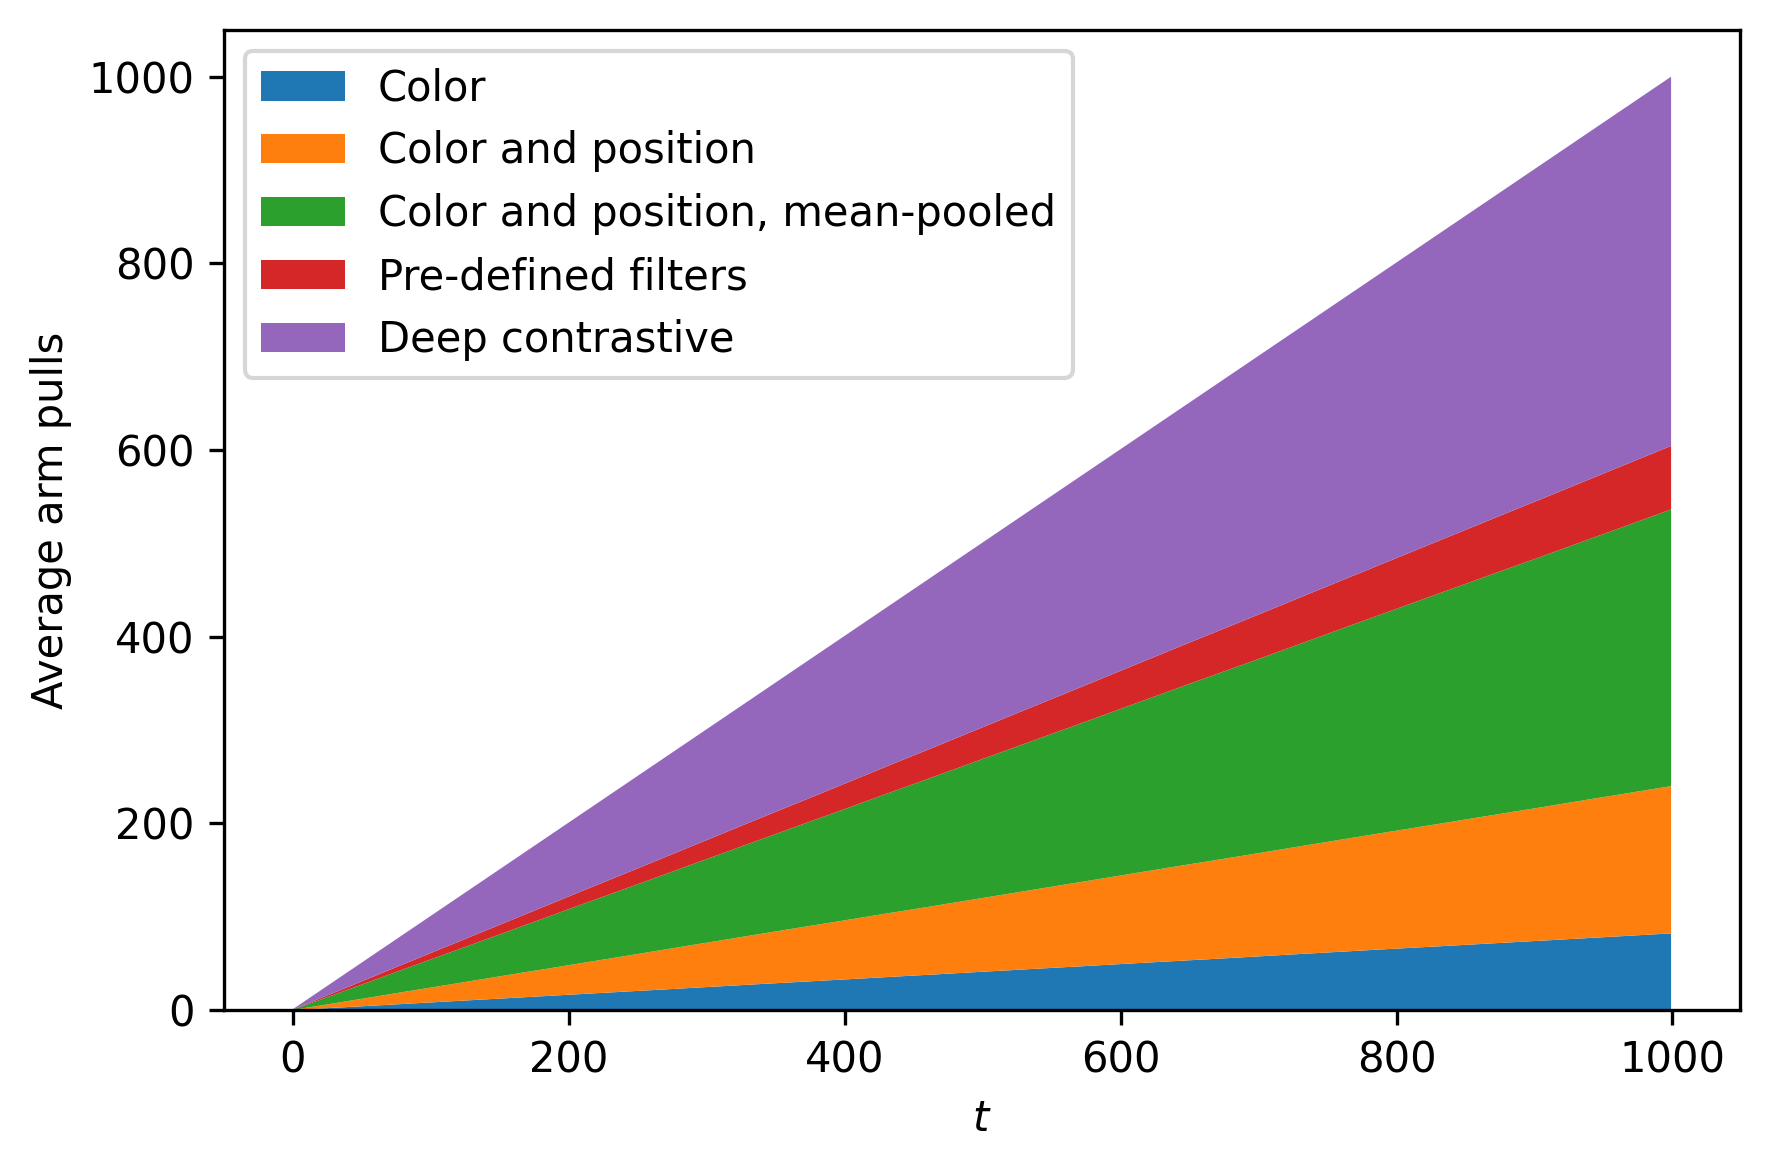

In [8]:
# matplotlib.style.use('classic')
pulled_arm = np.zeros_like(e_greedy_01_opt)
for i in range(2000):
    no_rl_shuffled = no_rl.sample(frac=1, random_state=i).reset_index()
    accs = no_rl_shuffled[['color_acc', 'color_pos_acc', 'mean_pool_acc', 'filters_acc', 'deep_acc']].to_numpy()[:1000, :]
    pulled_arm[i] = (always_best[i].reshape(-1, 1) == accs).argmax(axis=1)

pulled_arm_0 = (pulled_arm == 0).astype(int)
pulled_arm_1 = (pulled_arm == 1).astype(int)
pulled_arm_2 = (pulled_arm == 2).astype(int)
pulled_arm_3 = (pulled_arm == 3).astype(int)
pulled_arm_4 = (pulled_arm == 4).astype(int)

for t in range(1, 1000):
    pulled_arm_0[:, t] = pulled_arm_0[:, t] + pulled_arm_0[:, t-1]
    pulled_arm_1[:, t] = pulled_arm_1[:, t] + pulled_arm_1[:, t-1]
    pulled_arm_2[:, t] = pulled_arm_2[:, t] + pulled_arm_2[:, t-1]
    pulled_arm_3[:, t] = pulled_arm_3[:, t] + pulled_arm_3[:, t-1]
    pulled_arm_4[:, t] = pulled_arm_4[:, t] + pulled_arm_4[:, t-1]

pulled_arm_0 = pulled_arm_0.mean(axis=0)
pulled_arm_1 = pulled_arm_1.mean(axis=0)
pulled_arm_2 = pulled_arm_2.mean(axis=0)
pulled_arm_3 = pulled_arm_3.mean(axis=0)
pulled_arm_4 = pulled_arm_4.mean(axis=0)

plt.figure(figsize=(6, 4))
plt.stackplot(np.arange(1000), pulled_arm_0, pulled_arm_1, pulled_arm_2, pulled_arm_3, pulled_arm_4, labels=['Color','Color and position','Color and position, mean-pooled', 'Pre-defined filters', 'Deep contrastive'])  # , colors=def_colors)
plt.legend(loc='upper left')
plt.xlabel('$t$')
plt.ylabel('Average arm pulls')
plt.tight_layout()
plt.show()

In [9]:
mean_cumulative_reward_per_t = {
    'Random': 0,
    'Optimal': 0,
    'Always Deep': 0,
    'No exploration': 0,
    'Greedy': 0,
    'Greedy (Optimistic)': 0,
    r'$\epsilon$-greedy ($\epsilon=0.2$)': 0,
    r'$\epsilon$-greedy ($\epsilon=0.1$, Optimistic)': 0,
    r'$\epsilon$-greedy ($\epsilon=0.1$)': 0,
    'UCB': 0,
    'UCB (Optimistic)': 0,
    'UCB (Smaller bound)': 0,
    'LinUCB': 0,
}
for setup in mean_cumulative_reward_per_t:
    mean_cumulative_reward_per_t[setup] = results[setup].copy()
    for t in range(1, 1000):
        mean_cumulative_reward_per_t[setup][:, t] += mean_cumulative_reward_per_t[setup][:, t-1]
    for t in range(1000):
        mean_cumulative_reward_per_t[setup][:, t] /= (t+1)

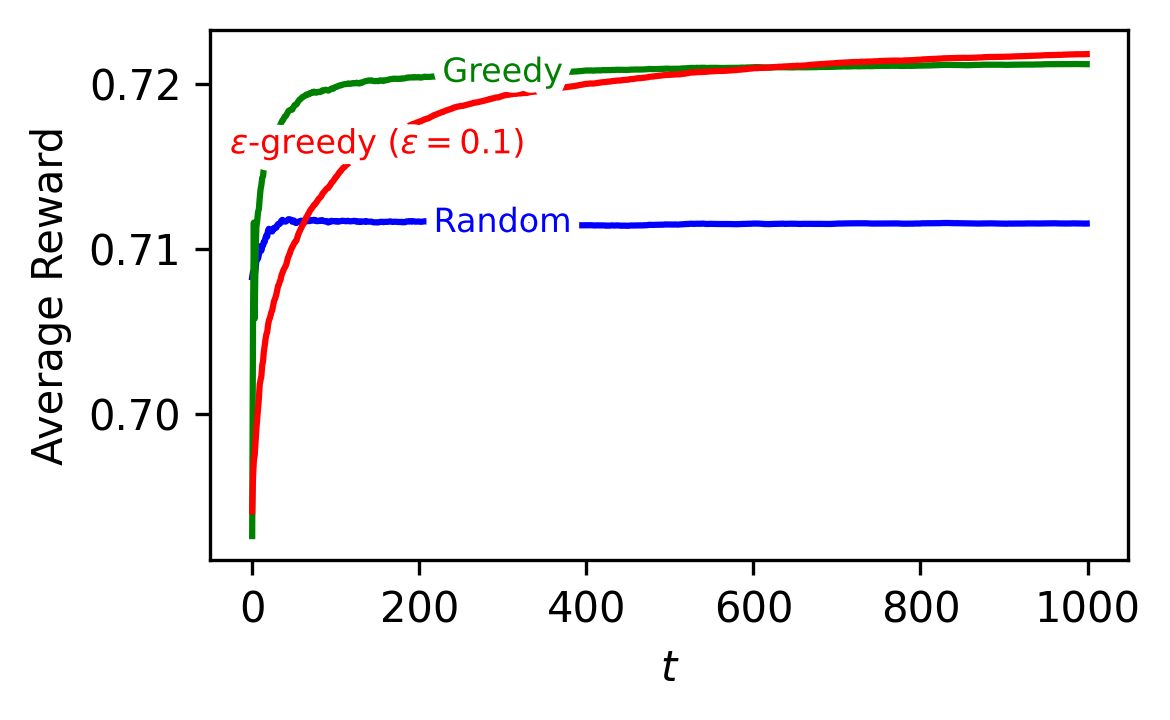

In [14]:
plt.figure(figsize=(4, 2.5))
plt.plot(np.arange(1000), mean_cumulative_reward_per_t['Random'].mean(axis=0), label='Random', color=def_colors[0])
plt.plot(np.arange(1000), mean_cumulative_reward_per_t['Greedy'].mean(axis=0), label='Greedy', color=def_colors[1])
plt.plot(np.arange(1000), mean_cumulative_reward_per_t['$\epsilon$-greedy ($\epsilon=0.1$)'].mean(axis=0), label='$\epsilon$-greedy ($\epsilon=0.1$)', color=def_colors[2])
plt.xlabel(r'$t$')
plt.ylabel('Average Reward')
lines = plt.gca().get_lines()
xvals = [300, 300, 150]
labelLines(lines, align=False, fontsize=8, xvals=xvals)
plt.tight_layout()
plt.show()

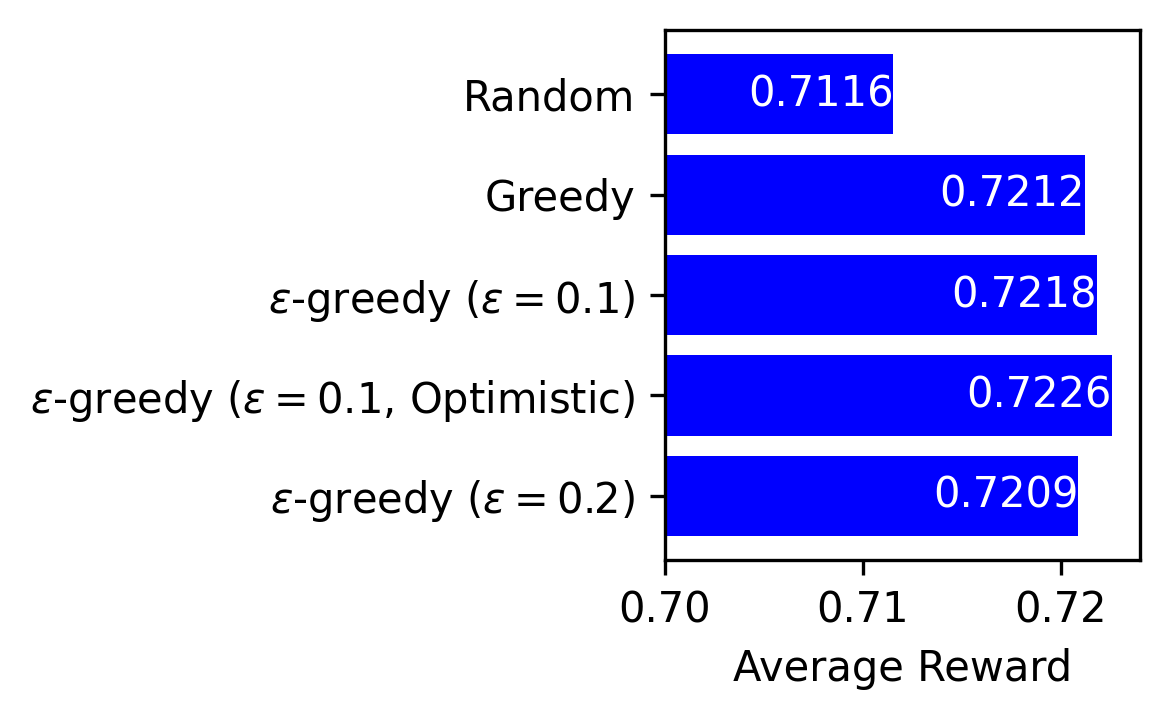

In [15]:
plt.figure(figsize=(4, 2.5))
plt.barh(
    ['Random', 'Greedy', '$\epsilon$-greedy ($\epsilon=0.1$)', '$\epsilon$-greedy ($\epsilon=0.1$, Optimistic)', '$\epsilon$-greedy ($\epsilon=0.2$)'][::-1],
    [
        mean_cumulative_reward_per_t['Random'].mean(axis=0)[-1],
        mean_cumulative_reward_per_t['Greedy'].mean(axis=0)[-1],
        mean_cumulative_reward_per_t['$\epsilon$-greedy ($\epsilon=0.1$)'].mean(axis=0)[-1],
        mean_cumulative_reward_per_t['$\epsilon$-greedy ($\epsilon=0.1$, Optimistic)'].mean(axis=0)[-1],
        mean_cumulative_reward_per_t['$\epsilon$-greedy ($\epsilon=0.2$)'].mean(axis=0)[-1],
    ][::-1],
    color=['b']
)
for method, label in zip(['Random', 'Greedy', '$\epsilon$-greedy ($\epsilon=0.1$)', '$\epsilon$-greedy ($\epsilon=0.1$, Optimistic)', '$\epsilon$-greedy ($\epsilon=0.2$)'][::-1], [
        mean_cumulative_reward_per_t['Random'].mean(axis=0)[-1],
        mean_cumulative_reward_per_t['Greedy'].mean(axis=0)[-1],
        mean_cumulative_reward_per_t['$\epsilon$-greedy ($\epsilon=0.1$)'].mean(axis=0)[-1],
        mean_cumulative_reward_per_t['$\epsilon$-greedy ($\epsilon=0.1$, Optimistic)'].mean(axis=0)[-1],
        mean_cumulative_reward_per_t['$\epsilon$-greedy ($\epsilon=0.2$)'].mean(axis=0)[-1],
    ][::-1]):
    plt.text(
        label, method, str(round(label, 4)), ha="right", color='w', va="center"
    )
plt.xlim(0.70, 0.724)
plt.xlabel('Average Reward')
plt.tight_layout()
plt.show()

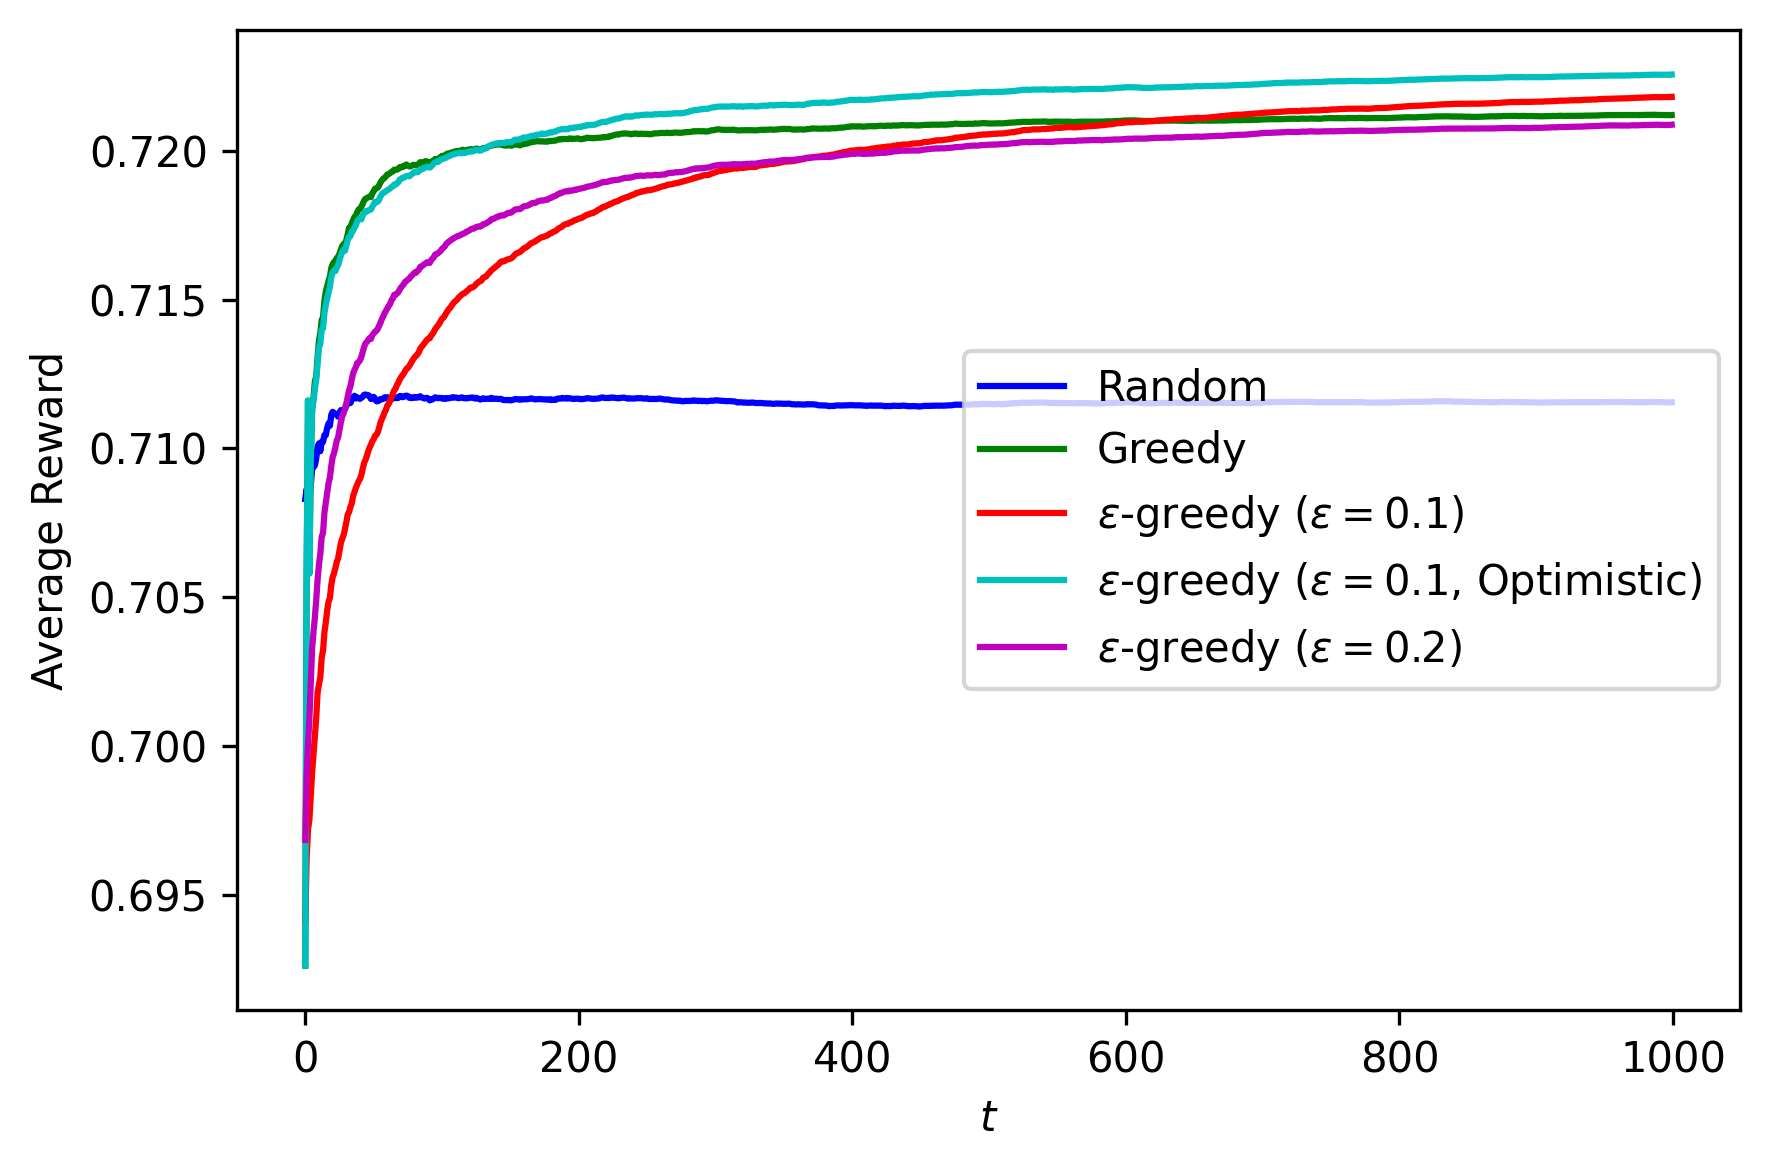

In [165]:
plt.figure(figsize=(6, 4))
plt.plot(np.arange(1000), mean_cumulative_reward_per_t['Random'].mean(axis=0), label='Random', color=def_colors[0])
plt.plot(np.arange(1000), mean_cumulative_reward_per_t['Greedy'].mean(axis=0), label='Greedy', color=def_colors[1])
plt.plot(np.arange(1000), mean_cumulative_reward_per_t['$\epsilon$-greedy ($\epsilon=0.1$)'].mean(axis=0), label='$\epsilon$-greedy ($\epsilon=0.1$)', color=def_colors[2])
plt.plot(np.arange(1000), mean_cumulative_reward_per_t['$\epsilon$-greedy ($\epsilon=0.1$, Optimistic)'].mean(axis=0), label='$\epsilon$-greedy ($\epsilon=0.1$, Optimistic)', color=def_colors[3])
plt.plot(np.arange(1000), mean_cumulative_reward_per_t['$\epsilon$-greedy ($\epsilon=0.2$)'].mean(axis=0), label='$\epsilon$-greedy ($\epsilon=0.2$)', color=def_colors[4])
plt.xlabel(r'$t$')
plt.ylabel('Average Reward')
lines = plt.gca().get_lines()
# xvals = [120, 300, 800, ]
# labelLines(lines, align=False, fontsize=8)#, xvals=xvals)
plt.legend(loc='center right')
plt.tight_layout()
plt.show()

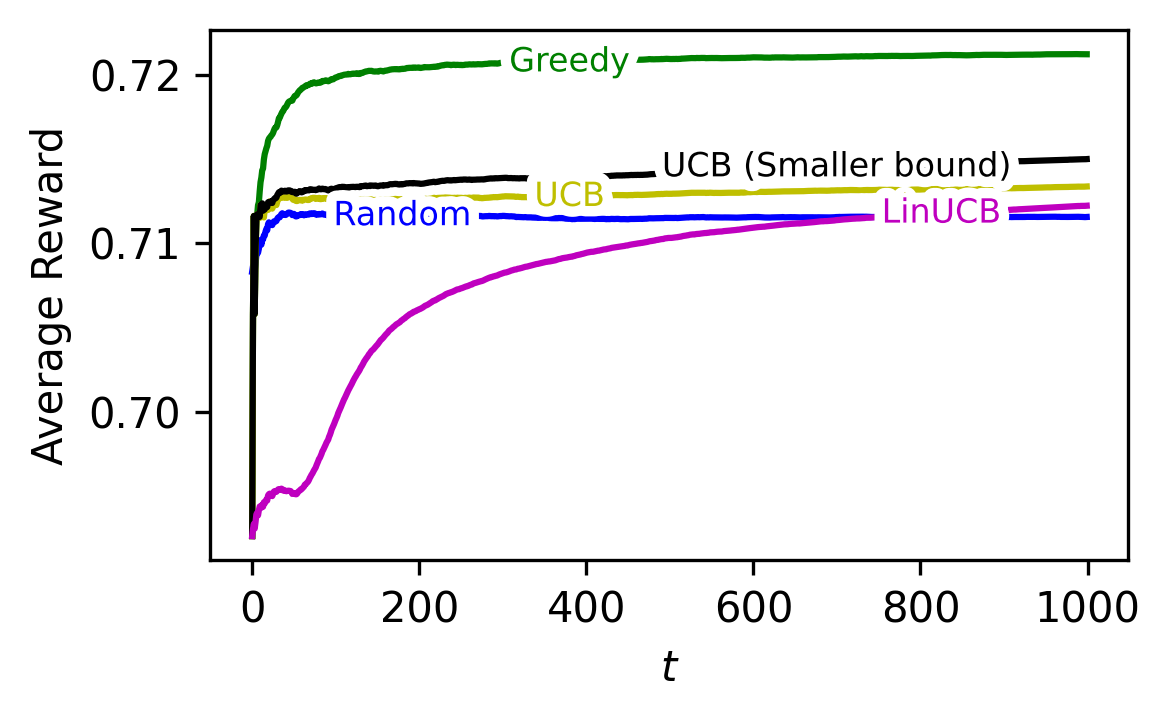

In [17]:
plt.figure(figsize=(4, 2.5))
plt.plot(np.arange(1000), mean_cumulative_reward_per_t['Random'].mean(axis=0), label='Random', color=def_colors[0])
plt.plot(np.arange(1000), mean_cumulative_reward_per_t['Greedy'].mean(axis=0), label='Greedy', color=def_colors[1])
plt.plot(np.arange(1000), mean_cumulative_reward_per_t['UCB'].mean(axis=0), label='UCB', color=def_colors[5])
plt.plot(np.arange(1000), mean_cumulative_reward_per_t['UCB (Smaller bound)'].mean(axis=0), label='UCB (Smaller bound)', color=def_colors[6])
plt.plot(np.arange(1000), mean_cumulative_reward_per_t['LinUCB'].mean(axis=0), label='LinUCB', color=def_colors[4])
plt.xlabel(r'$t$')
plt.ylabel('Average Reward')
lines = plt.gca().get_lines()
xvals = [180, 380, 380, 700, 825]
labelLines(lines, align=False, fontsize=8, xvals=xvals)
plt.tight_layout()
plt.show()

In [81]:
correct_2000 = np.zeros_like(random_choice)
for i in range(2000):
    no_rl_shuffled = no_rl.sample(frac=1, random_state=i).reset_index()
    correct_2000[i] = no_rl_shuffled[['color_acc', 'color_pos_acc', 'mean_pool_acc', 'filters_acc', 'deep_acc']].max(axis=1).to_numpy()[:1000]

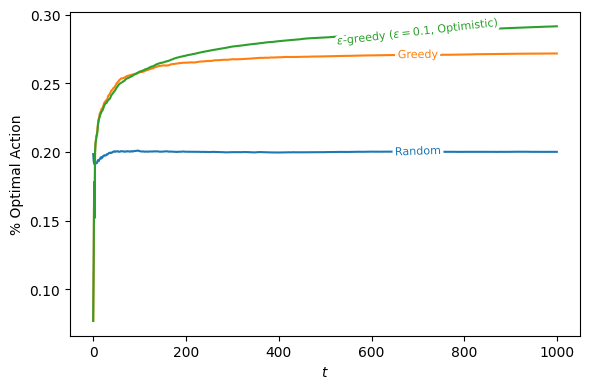

In [82]:
mean_frac_correct_per_t = {
    'Random': 0,
    # 'Optimal': 0,
    # 'Always Deep': 0,
    # 'No exploration': 0,
    'Greedy': 0,
    # 'Greedy (Optimistic)': 0,
    # r'$\epsilon$-greedy ($\epsilon=0.1$)': 0,
    # r'$\epsilon$-greedy ($\epsilon=0.2$)': 0,
    r'$\epsilon$-greedy ($\epsilon=0.1$, Optimistic)': 0,
    # 'UCB': 0,
    # 'UCB (Optimistic)': 0,
    # 'UCB, smaller bound': 0,
    # 'LinUCB': 0,
}
for setup in mean_frac_correct_per_t:
    preds = results[setup]
    mean_frac_correct_per_t[setup] = np.isclose(preds, correct_2000).astype(float)
    for t in range(1, 1000):
        mean_frac_correct_per_t[setup][:, t] += mean_frac_correct_per_t[setup][:, t-1]
    for t in range(1000):
        mean_frac_correct_per_t[setup][:, t] /= (t+1)


colors = iter(plt.get_cmap('viridis')(np.linspace(0, 1, 8)))
plt.figure(figsize=(, 4))
for i, setup in enumerate(mean_frac_correct_per_t):
    if 'Always' in setup:
        continue
    plt.plot(np.arange(1000), mean_frac_correct_per_t[setup].mean(axis=0), label=setup) #, color=next(colors))
plt.xlabel(r'$t$')
plt.ylabel(r'% Optimal Action')
# plt.legend()
lines = plt.gca().get_lines()
# plt.ylim(0, 1)
labelLines(lines, align=True, fontsize=8, xvals=[700] * len(mean_frac_correct_per_t))
# plt.legend(ncol=4, bbox_to_anchor=(1.5, 1.5))
plt.tight_layout()
plt.show()

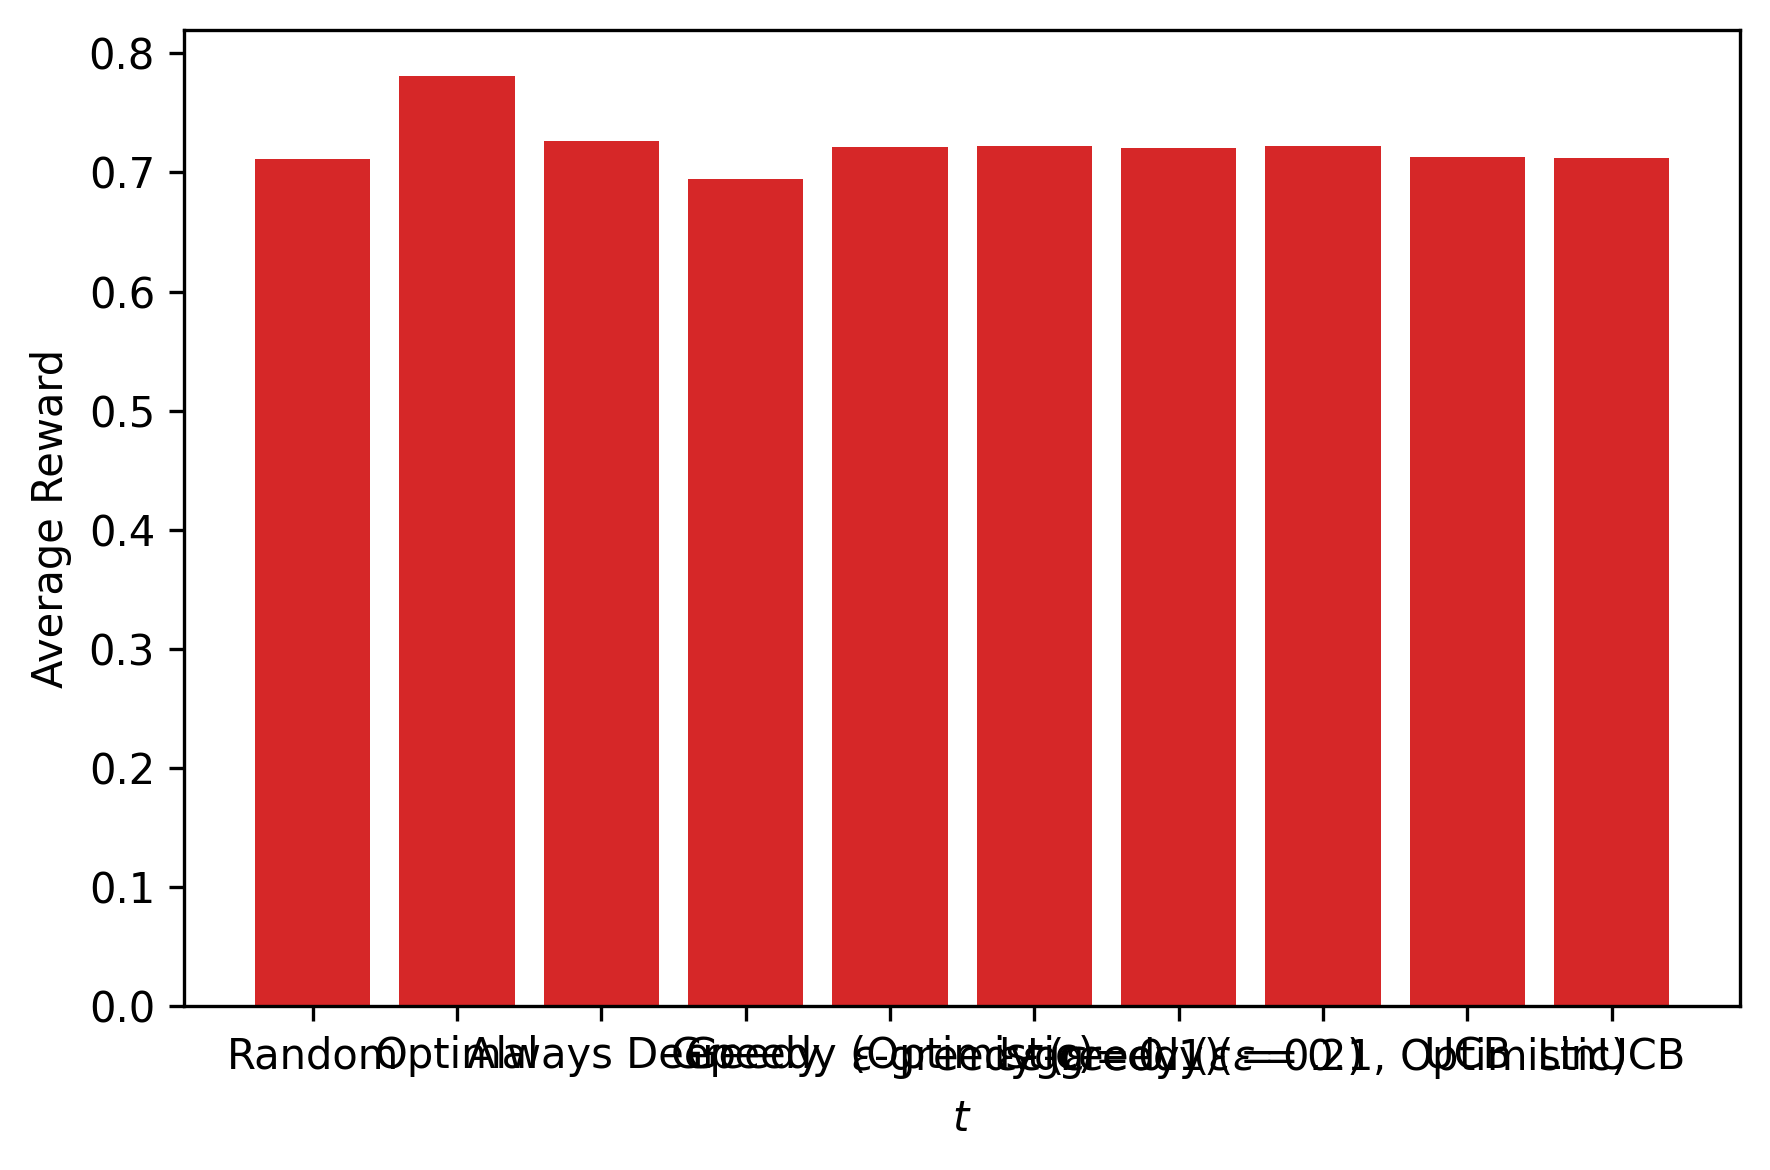

In [266]:
mean_reward = {
    'Random': 0,
    'Optimal': 0,
    'Always Deep': 0,
    'Greedy': 0,
    'Greedy (Optimistic)': 0,
    r'$\epsilon$-greedy ($\epsilon=0.1$)': 0,
    r'$\epsilon$-greedy ($\epsilon=0.2$)': 0,
    r'$\epsilon$-greedy ($\epsilon=0.1$, Optimistic)': 0,
    'UCB': 0,
    'LinUCB': 0,
}
for setup in mean_reward:
    mean_reward[setup] = results[setup].copy().mean()
    # for t in range(1, 1000):
    #     mean_cumulative_reward_per_t[setup][:, t] += mean_cumulative_reward_per_t[setup][:, t-1]
    # for t in range(1000):
    #     mean_cumulative_reward_per_t[setup][:, t] /= (t+1)

colors = iter(plt.get_cmap('viridis')(np.linspace(0, 1, 8)))
plt.figure(figsize=(6, 4))
for i, setup in enumerate(mean_frac_correct_per_t):
    if 'Always Best' in setup:
        continue
    plt.bar(list(mean_reward.keys()), list(mean_reward.values()))
plt.xlabel(r'$t$')
plt.ylabel('Average Reward')
# plt.legend()
# plt.legend(ncol=4, bbox_to_anchor=(1.5, 1.5))

plt.tight_layout()
plt.show()

In [ ]:
plt.figure(figsize=(6, 3.5))

ind = np.array([0, 1, 2])
width = 0.3
configs = ['Baseline', 'Image-wise deployment', 'Pixel-wise deployment']
train = [0.6110, 0.7862, 0.7180]
val = [0.5346, 0.6211, 0.7120]
plt.bar(ind, train, label='Training', color=colors[0], width=width)
plt.bar(ind + width, val, label='Validation', color=colors[1], width=width)

In [33]:
color = pd.read_csv('experiments/color/results.csv')
color_pos = pd.read_csv('experiments/color_pos/results.csv')
mean_pool = pd.read_csv('experiments/mean_pool/results.csv')
filters = pd.read_csv('experiments/filters/results.csv')
deep = pd.read_csv('experiments/deep/results.csv')

In [8]:
with open('dataset.pkl', 'rb') as f:
    dataset = pickle.load(f)
dataset = dataset[:150]

In [47]:
def eval_test_acc(row):
    path, img, gt_mask = dataset[row['img_index']]
    assert path == row['img_path']

    preds = np.array(eval(row['preds']))
    gt_mask = gt_mask.reshape(-1)

    test_split = int(len(preds) * 0.7)

    preds = preds[test_split:]
    gt_mask = gt_mask[test_split:]
    return (preds == gt_mask).sum() / gt_mask.shape[0]

color['test_acc'] = color.apply(eval_test_acc, axis=1)
color_pos['test_acc'] = color_pos.apply(eval_test_acc, axis=1)
mean_pool['test_acc'] = mean_pool.apply(eval_test_acc, axis=1)
filters['test_acc'] = filters.apply(eval_test_acc, axis=1)
deep['test_acc'] = deep.apply(eval_test_acc, axis=1)

In [53]:
color_logreg = pd.read_csv('experiments/color_logreg/results.csv')
color_pos_logreg = pd.read_csv('experiments/color_pos_logreg/results.csv')
mean_pool_logreg = pd.read_csv('experiments/mean_pool_logreg/results.csv')
filters_logreg = pd.read_csv('experiments/filters_logreg/results.csv')
# deep_logreg = pd.read_csv('experiments/deep_logreg/results.csv')

In [54]:
color_logreg['test_acc'] = color_logreg.apply(eval_test_acc, axis=1)
color_pos_logreg['test_acc'] = color_pos_logreg.apply(eval_test_acc, axis=1)
mean_pool_logreg['test_acc'] = mean_pool_logreg.apply(eval_test_acc, axis=1)
filters_logreg['test_acc'] = filters_logreg.apply(eval_test_acc, axis=1)
# deep['test_acc'] = deep.apply(eval_test_acc, axis=1)

In [48]:
def calc_frac_correct(row):
    path, img, gt_mask = dataset[row['img_index']]
    assert path == row['img_path']

    preds = np.array(eval(row['preds']))
    gt_mask = gt_mask.reshape(-1)
    frac_correct = np.zeros(gt_mask.shape)

    cur_num_correct = 0
    for t in range(len(preds)):
        cur_num_correct += int(preds[t] == gt_mask[t])
        frac_correct[t] = cur_num_correct / (t + 1)
    return frac_correct

color['frac_correct'] = color.apply(calc_frac_correct, axis=1)
color_pos['frac_correct'] = color_pos.apply(calc_frac_correct, axis=1)
mean_pool['frac_correct'] = mean_pool.apply(calc_frac_correct, axis=1)
filters['frac_correct'] = filters.apply(calc_frac_correct, axis=1)
deep['frac_correct'] = deep.apply(calc_frac_correct, axis=1)

In [68]:
with open('dataset.pkl', 'rb') as f:
    dataset = pickle.load(f)
dataset = dataset[:150]
naive_test_acc = 0
for i in range(len(dataset)):
    _, _, gt_mask = dataset[i]
    pred = np.ones_like(gt_mask)
    naive_test_acc += (pred == gt_mask).sum() / gt_mask.shape[0] / gt_mask.shape[1]
print(naive_test_acc / len(dataset))

0.6465395755964095


In [56]:
print(
    color[color.method == 'sgd'].test_acc.mean(),
    color[color.method == 'linucb'].test_acc.mean(),
    color_pos[color_pos.method == 'sgd'].test_acc.mean(),
    color_pos[color_pos.method == 'linucb'].test_acc.mean(),
    mean_pool[mean_pool.method == 'sgd'].test_acc.mean(),
    mean_pool[mean_pool.method == 'linucb'].test_acc.mean(),
    filters[filters.method == 'sgd'].test_acc.mean(),
    filters[filters.method == 'linucb'].test_acc.mean(),
    deep[deep.method == 'sgd'].test_acc.mean(),
    deep[deep.method == 'linucb'].test_acc.mean(),
    color_logreg.test_acc.mean(),
    color_pos_logreg.test_acc.mean(),
    mean_pool_logreg.test_acc.mean(),
    filters_logreg.test_acc.mean(),
    sep='\n'
)

0.7626543239071893
0.6358374902007599
0.7516634962734835
0.6141050284592557
0.6780276048371163
0.6200447983244182
0.6232166921703184
0.6396707317237891
0.8494733303637952
0.8215268300894388
0.7195868657618733
0.7992410852287537
0.8012919764340418
0.6818214983916616


In [67]:
color.iloc[8].test_acc, color_pos.iloc[8].test_acc, color.iloc[9].test_acc, color_pos.iloc[9].test_acc

(0.9047497072599532,
 0.4812524395003903,
 0.6980508391881343,
 0.8969189110070258)

sgd
linucb


(-0.1, 1.1)

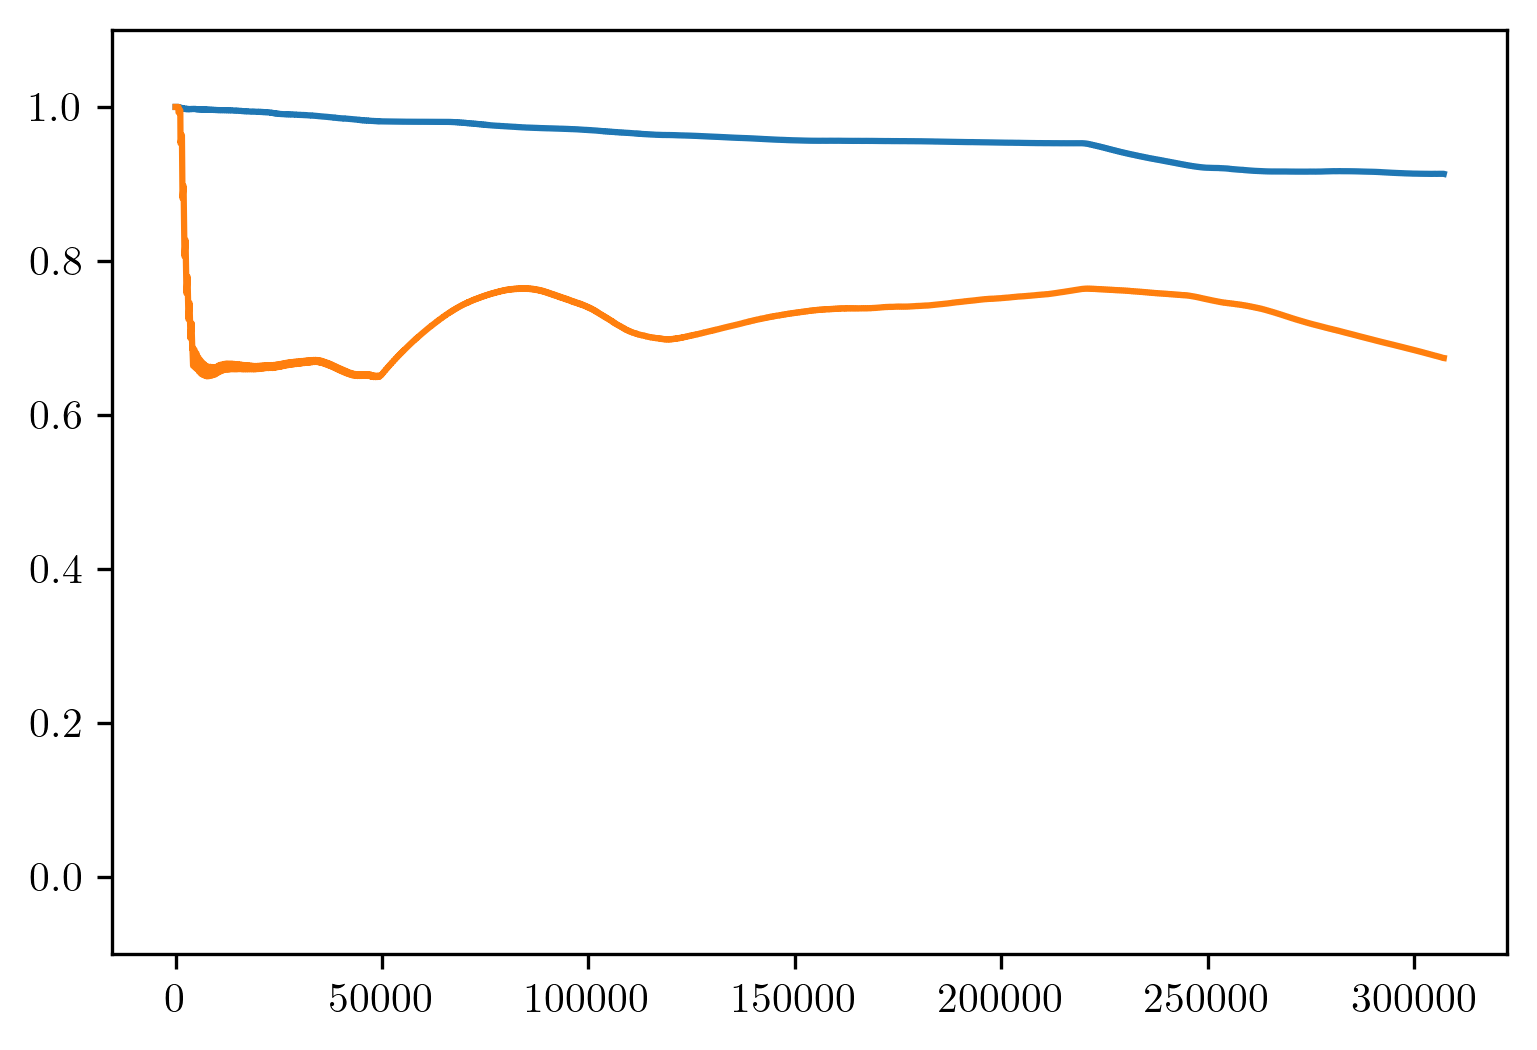

In [46]:
print(color.iloc[2].method)
print(color.iloc[3].method)
plt.figure(figsize=(6,4))
plt.plot(np.arange(len(color.iloc[2].frac_correct)), color.iloc[2].frac_correct)
plt.plot(np.arange(len(color.iloc[3].frac_correct)), color.iloc[3].frac_correct)
plt.ylim(-0.1, 1.1)

In [31]:
color[color.method == 'linucb'].test_acc.mean()

0.6358374902007599

In [32]:
color[color.method == 'sgd'].test_acc.mean()

0.7626543239071893

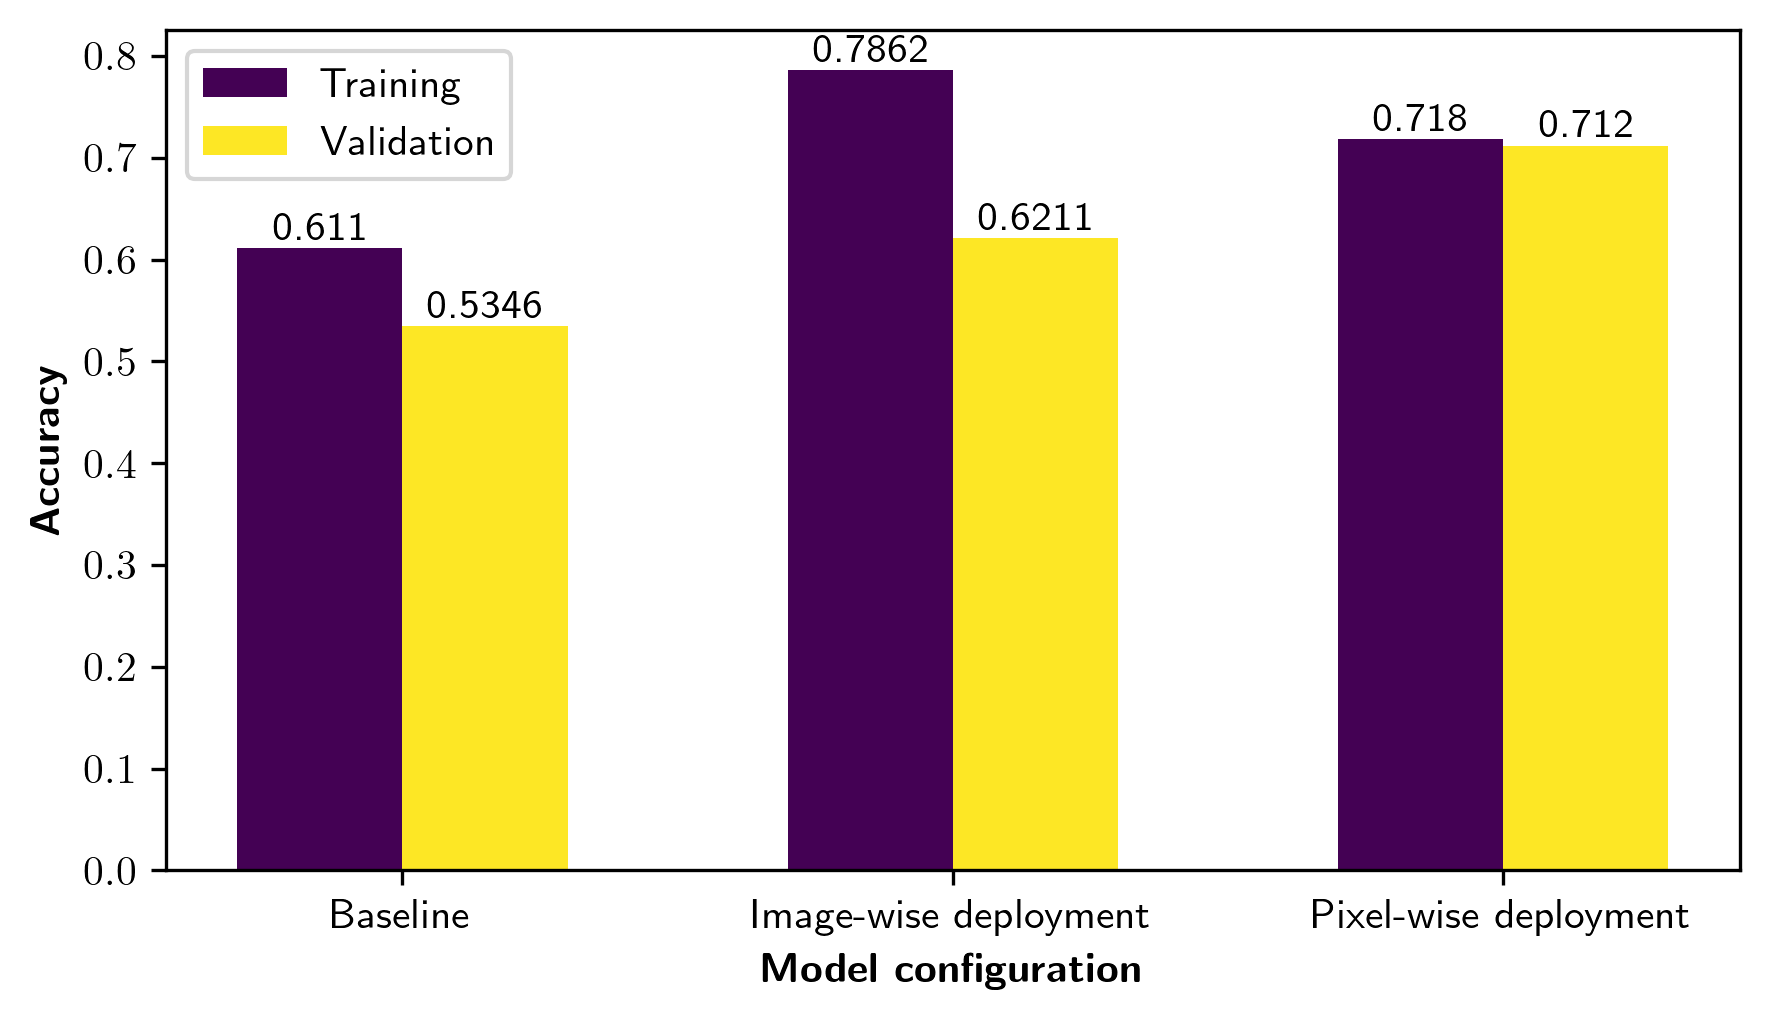

In [21]:
colors = plt.get_cmap('viridis')(np.linspace(0, 1, 2))
plt.figure(figsize=(6, 3.5))
ind = np.array([0, 1, 2])
width = 0.3
configs = ['Baseline', 'Image-wise deployment', 'Pixel-wise deployment']
train = [0.6110, 0.7862, 0.7180]
val = [0.5346, 0.6211, 0.7120]
plt.bar(ind, train, label='Training', color=colors[0], width=width)
plt.bar(ind + width, val, label='Validation', color=colors[1], width=width)

for i, t in zip(ind, train):
    plt.text(i, t, str(round(t, 4)), ha='center', va='bottom')
for i, t in zip(ind, val):
    plt.text(i + width, t, str(round(t, 4)), ha='center', va='bottom')

plt.xlabel(r'\textbf{Model configuration}')
plt.ylabel(r'\textbf{Accuracy}')
plt.xticks(ind + width / 2, configs)
plt.legend()
plt.tight_layout()
plt.show()

In [7]:
from pycocotools.coco import COCO
import os
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

coco = COCO('/Users/timothydai/Documents/cs 131/bandit-segmentation/coco/annotations/instances_train2017.json')
img_dir = '/Users/timothydai/Documents/cs 131/bandit-segmentation/coco/images/train2017'
image_id = 12448


loading annotations into memory...
Done (t=12.98s)
creating index...
index created!


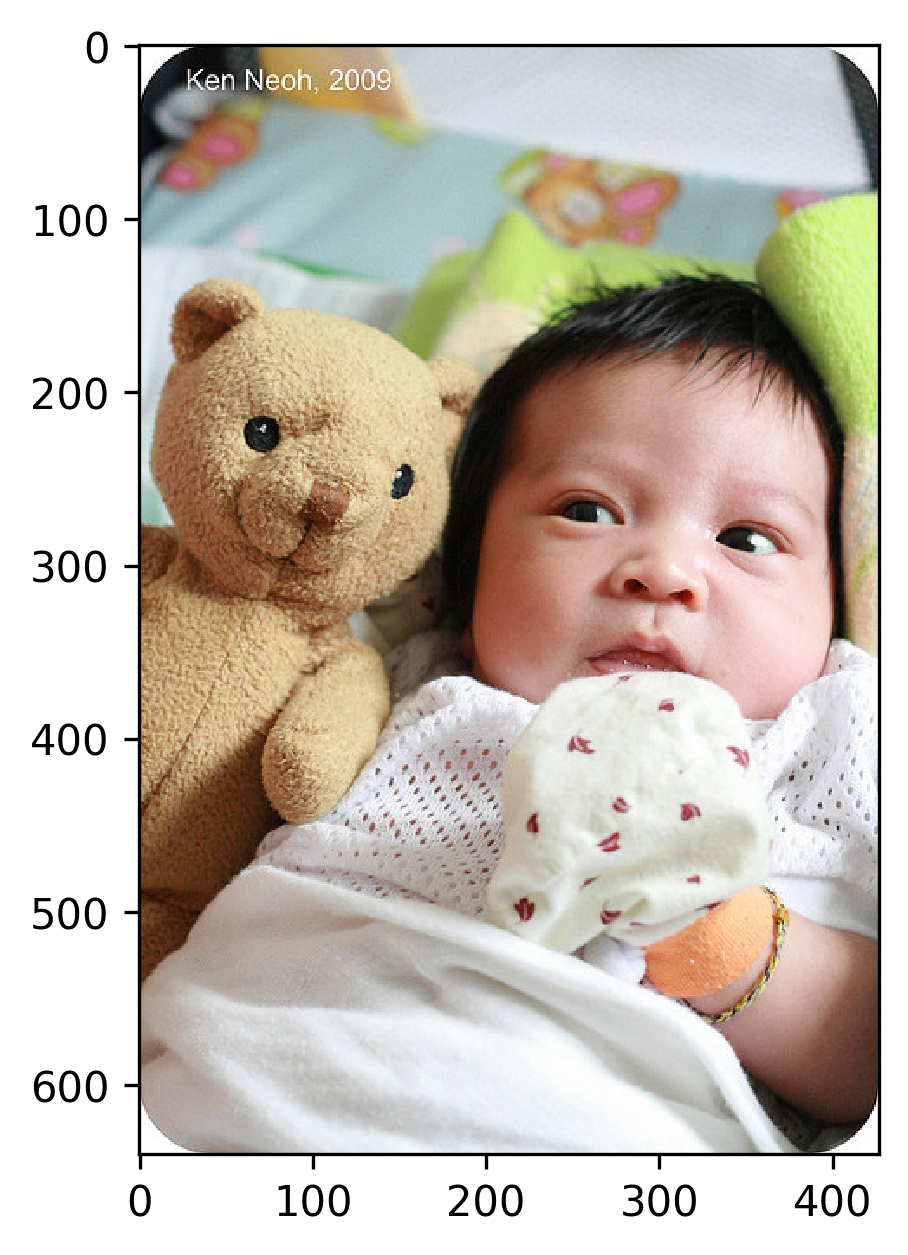

In [8]:
img = coco.imgs[image_id]
image = np.array(Image.open(os.path.join(img_dir, img['file_name'])))
plt.imshow(image, interpolation='nearest')
plt.show()


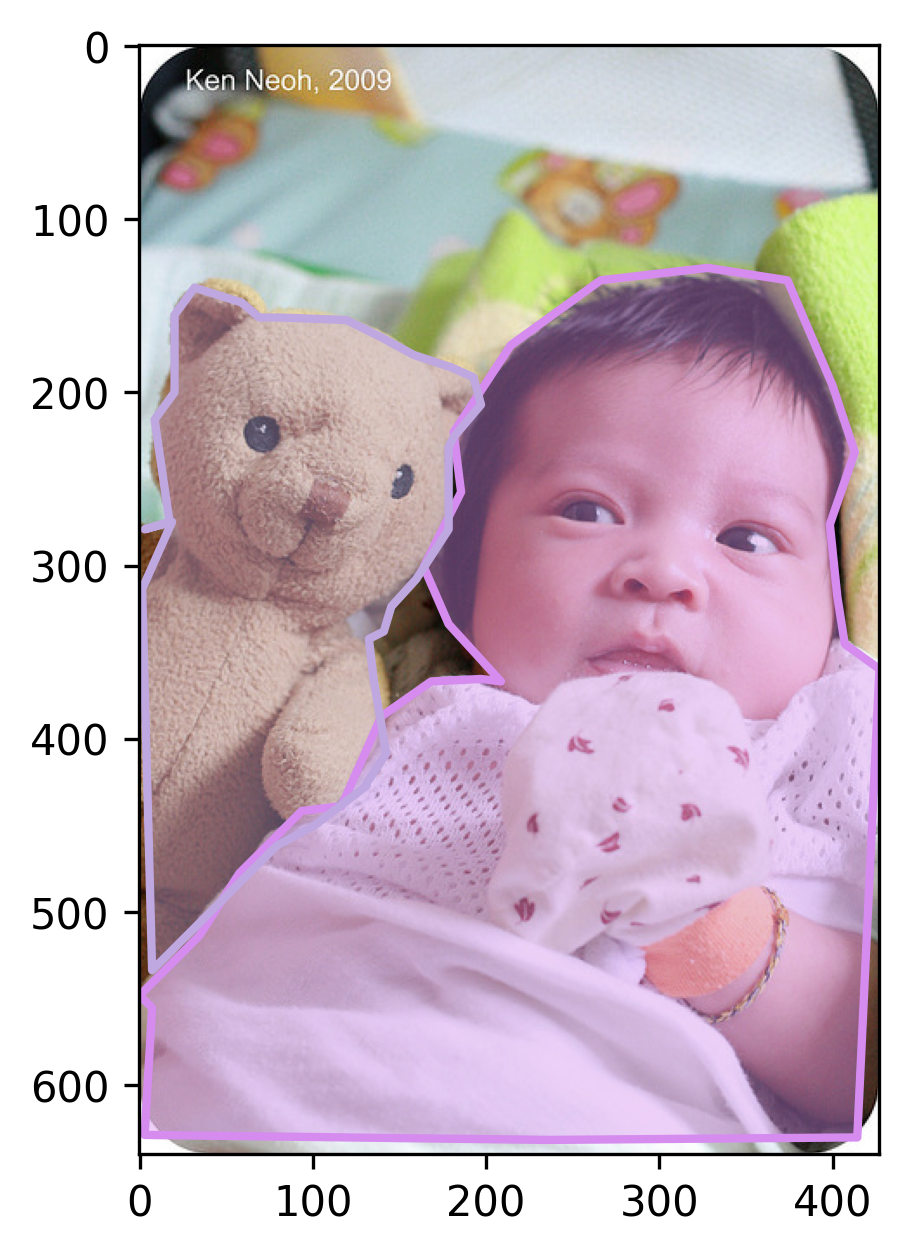

In [10]:
plt.imshow(image)
cat_ids = coco.getCatIds()
anns_ids = coco.getAnnIds(imgIds=img['id'], catIds=cat_ids, iscrowd=None)
anns = coco.loadAnns(anns_ids)
coco.showAnns(anns)

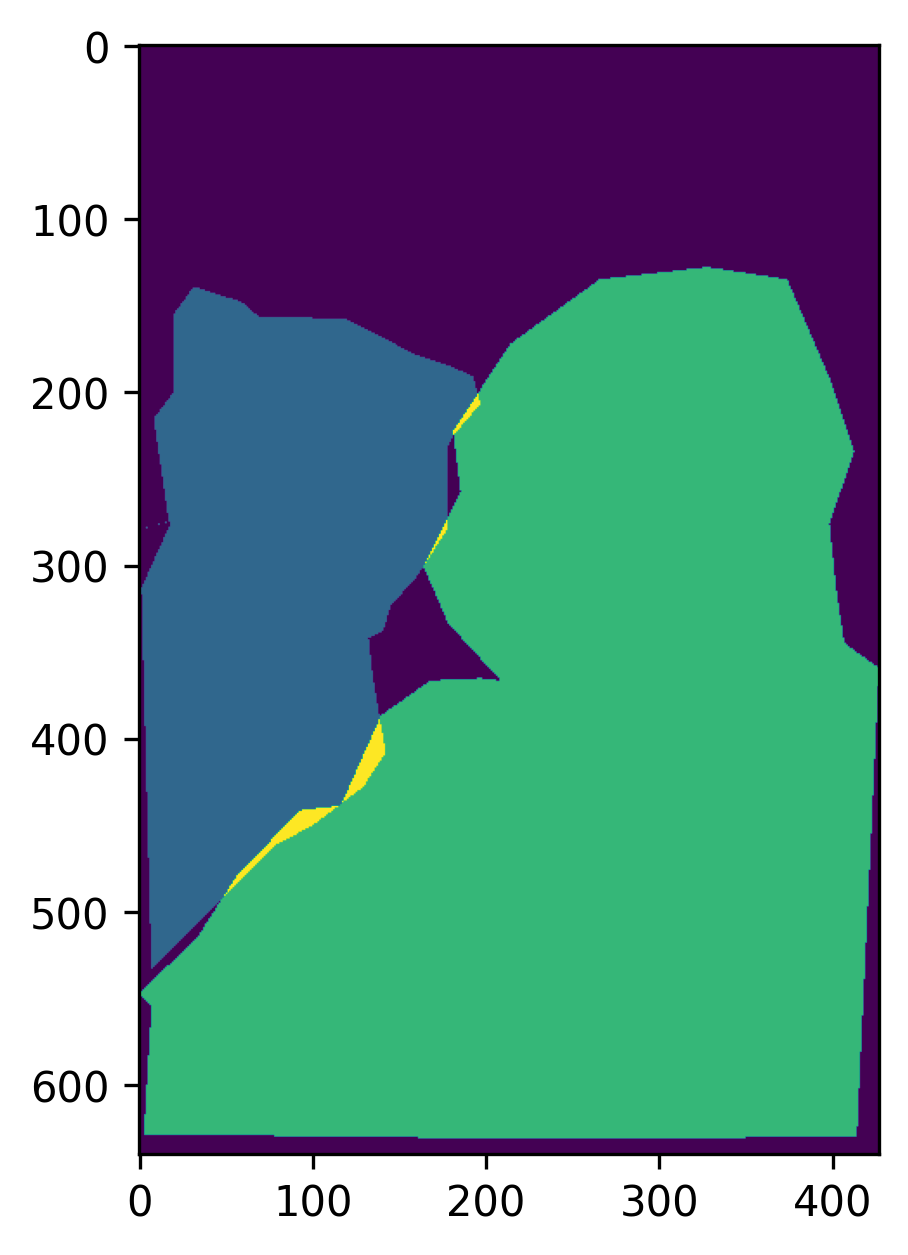

In [11]:
mask = coco.annToMask(anns[0])
for i in range(len(anns)):
    mask += coco.annToMask(anns[i])

plt.imshow(mask)